# PROJET 7

In [2]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from dataprep import eda
import qgrid
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)
import joblib 
from numba import njit
from numba import generated_jit
from numba import types

from sklearn.utils import resample
from collections import Counter

%matplotlib inline 

import gc
import time
from contextlib import contextmanager
# File system manangement
import os
import os.path
from os import path 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import average_precision_score

from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, auc

from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.compose import TransformedTargetRegressor
from sklearn.compose import ColumnTransformer
from sklearn.datasets import make_classification

from collections import Counter
from sklearn.dummy import DummyClassifier

from imblearn.over_sampling import SMOTE 
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import TomekLinks

import scipy.stats as stats
from sklearn.metrics import confusion_matrix, make_scorer

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
import shap
import pickle
import joblib

@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

bleu = (70 / 255, 130 / 255, 180 / 255)
pd.set_option('display.max_row', 219)
pd.set_option('display.max_column', 243)
pd.set_option('display.max_colwidth', 50)

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# <font color='blue'>1 - CLIENTS DATA </font>

In [13]:
# Charger les descripteurs ORB extraits dans la question précédente
with open('./data/clients_data.pkl', 'rb') as f:
    clients_data = pickle.load(f)

In [14]:
clients_data["DAYS_BIRTH"] = abs(clients_data["DAYS_BIRTH"]) // 365
clients_data["DAYS_BIRTH"]

SK_ID_CURR
100002    25
100003    45
100004    52
100006    52
100007    54
          ..
456251    25
456252    56
456253    41
456254    32
456255    46
Name: DAYS_BIRTH, Length: 284891, dtype: int64

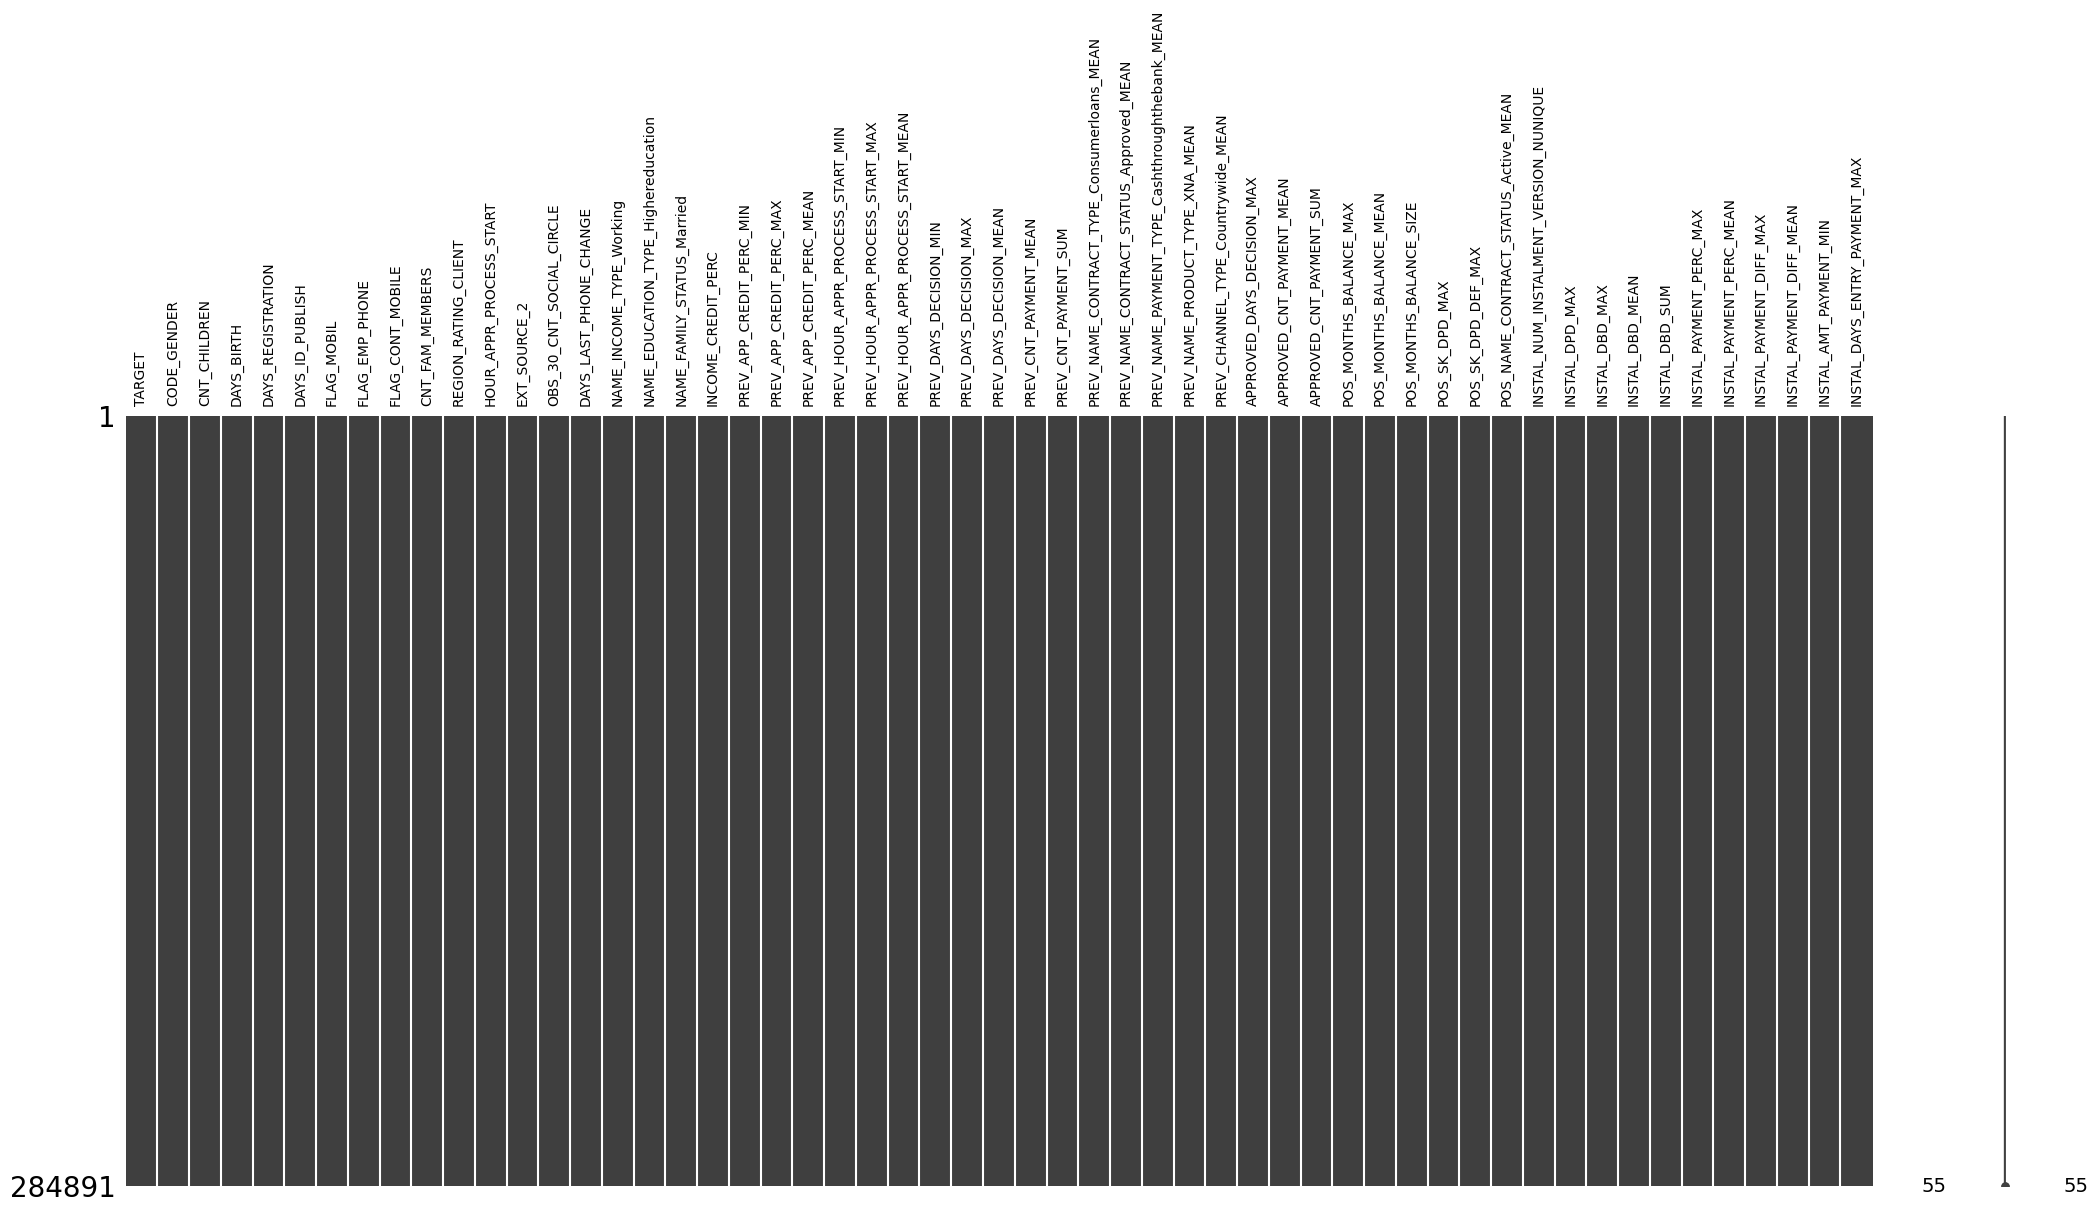

In [15]:
import missingno as msno
import matplotlib.pyplot as plt

# Assuming clients_data is a DataFrame loaded from the pickle file
msno.matrix(clients_data)

# Add column names
plt.xticks(range(clients_data.shape[1]), clients_data.columns, rotation=90)
plt.show()


In [16]:
# Descriptive Statistics of features
#clients_data.reset_index(inplace=True)

In [6]:
with open('./data/clients_data_final.pkl', 'wb') as f:
    pickle.dump(clients_data, f)

In [17]:
# Load the model fitted on all features
# Set the filename
load_path = 'Models/'
name =load_path+'model_features'
file_name = name+'.pkl'

fitted_model = joblib.load(file_name)
#fitted_model.get_params(deep = False)

# <font color='blue'>2 - DATA SPLIT </font>

In [18]:
# Charger les données
with open('./data/clients_data_final.pkl', 'rb') as f:
    clients_data_final = pickle.load(f)


#app_train
X = clients_data_final.copy()

y = X['TARGET']

X.drop(columns=['TARGET'],inplace=True)

## Split data
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.20)

# Median imputation of missing values
#imputer = SimpleImputer(strategy='median')

# Fit on the training data and transform both train and test data
#X_train = imputer.fit_transform(X_train)
#X_test = imputer.transform(X_test)

scaler = StandardScaler()

# Fit on the training data and transform both train and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [19]:
X_test_scaled

array([[ 0.71345022, -0.58219724,  1.30066091, ...,  0.07150102,
         2.51712759,  0.57502221],
       [ 0.71345022,  2.16517293, -0.62564572, ...,  0.07150102,
        -0.10891079,  0.54398855],
       [ 0.71345022, -0.58219724,  0.2118789 , ..., -3.10224489,
        -0.61830133,  0.26080641],
       ...,
       [ 0.71345022, -0.58219724,  1.13315598, ...,  0.07150102,
         0.74034485,  0.03775198],
       [ 0.71345022, -0.58219724,  1.88692814, ..., -1.01544388,
        -0.62246226,  0.5672638 ],
       [ 0.71345022, -0.58219724, -1.54692281, ...,  0.07150102,
        -0.35016026, -2.68545166]])

In [20]:
with open('./APP/X_test_scaled.pkl', 'wb') as f:
    pickle.dump(X_test_scaled, f)

In [21]:
with open('./APP/X_train_scaled.pkl', 'wb') as f:
    pickle.dump(X_train_scaled, f) 

## <font color='blue'>X_test_scaled as a DataFrame </font>

In [61]:

# Copy the original X_test DataFrame to a new DataFrame
X_test_scaled_REVERTEDBACK = X_test.copy()

# Replace the values in new_X_test with the scaled values from X_test_scaled
X_test_scaled_REVERTEDBACK[X_test.columns] = X_test_scaled
X_test_scaled_REVERTEDBACK.reset_index(inplace=True)
# Print the new DataFrame
X_test_scaled_REVERTEDBACK.head()

,SK_ID_CURR,CODE_GENDER,CNT_CHILDREN,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Highereducation,NAME_FAMILY_STATUS_Married,INCOME_CREDIT_PERC,PREV_APP_CREDIT_PERC_MIN,PREV_APP_CREDIT_PERC_MAX,PREV_APP_CREDIT_PERC_MEAN,PREV_HOUR_APPR_PROCESS_START_MIN,PREV_HOUR_APPR_PROCESS_START_MAX,PREV_HOUR_APPR_PROCESS_START_MEAN,PREV_DAYS_DECISION_MIN,PREV_DAYS_DECISION_MAX,PREV_DAYS_DECISION_MEAN,PREV_CNT_PAYMENT_MEAN,PREV_CNT_PAYMENT_SUM,PREV_NAME_CONTRACT_TYPE_Consumerloans_MEAN,PREV_NAME_CONTRACT_STATUS_Approved_MEAN,PREV_NAME_PAYMENT_TYPE_Cashthroughthebank_MEAN,PREV_NAME_PRODUCT_TYPE_XNA_MEAN,PREV_CHANNEL_TYPE_Countrywide_MEAN,APPROVED_DAYS_DECISION_MAX,APPROVED_CNT_PAYMENT_MEAN,APPROVED_CNT_PAYMENT_SUM,POS_MONTHS_BALANCE_MAX,POS_MONTHS_BALANCE_MEAN,POS_MONTHS_BALANCE_SIZE,POS_SK_DPD_MAX,POS_SK_DPD_DEF_MAX,POS_NAME_CONTRACT_STATUS_Active_MEAN,INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE,INSTAL_DPD_MAX,INSTAL_DBD_MAX,INSTAL_DBD_MEAN,INSTAL_DBD_SUM,INSTAL_PAYMENT_PERC_MAX,INSTAL_PAYMENT_PERC_MEAN,INSTAL_PAYMENT_DIFF_MAX,INSTAL_PAYMENT_DIFF_MEAN,INSTAL_AMT_PAYMENT_MIN,INSTAL_DAYS_ENTRY_PAYMENT_MAX
0,393656,0.713450,-0.582197,1.300661,1.167375,-0.860739,0.0,-2.129002,0.025918,-0.176301,-2.090191,-0.616017,0.835604,-0.175322,0.798224,-1.050328,-0.550720,0.749020,-0.547337,0.591947,-0.391054,0.175092,0.420288,-0.877078,-0.237458,1.392986,0.234457,0.997842,2.569504,-0.344938,1.183237,0.960532,-2.324602,0.998762,-1.034159,0.446157,2.994734,-0.189199,0.570568,1.253561,-0.770982,-0.102065,-0.048347,1.370875,-0.709010,-0.168092,-1.135816,-0.897489,-0.859599,-0.014351,-0.012371,-0.436007,0.071501,2.517128,0.575022
1,318455,0.713450,2.165173,-0.625646,1.177617,-0.266388,0.0,0.469704,0.025918,2.008578,-0.118862,-1.228791,0.716938,0.646977,0.312053,0.952084,-0.550720,0.749020,-0.305682,0.072273,-0.391054,-0.422174,-0.551751,0.696641,0.381372,0.933092,0.516297,0.801821,-1.036233,-0.505562,-0.873134,-1.251698,-0.875203,-0.013870,0.162844,0.375674,-0.766455,-0.485002,0.627372,0.928399,-0.028541,-0.102065,-0.048347,-0.144426,-0.709010,-0.158811,-0.676978,-0.296471,-0.401104,-0.014351,-0.012371,-0.436007,0.071501,-0.108911,0.543989
2,397180,0.713450,-0.582197,0.211879,-1.607571,1.688943,0.0,0.469704,0.025918,-1.268740,-0.118862,-0.616017,-0.189906,-0.175322,0.564370,-1.050328,-0.550720,-1.335078,-0.360856,0.483721,-0.022405,0.286577,0.420288,0.067153,0.195723,0.078505,0.455767,0.549829,-1.036233,-0.505562,-1.119899,-1.362309,-0.971829,-1.127766,-1.034159,0.102780,-0.229143,-0.485002,0.343351,0.202970,-0.152281,-0.102065,-0.048347,0.244112,0.386083,-0.149530,-0.147549,-0.495959,-0.470125,-0.006652,-0.005213,1.287158,-3.102245,-0.618301,0.260806
3,240434,0.713450,-0.582197,0.881899,0.110198,-0.297530,0.0,0.469704,0.025918,-0.176301,-0.118862,0.303145,0.172945,-0.586472,1.231470,0.952084,-0.550720,0.749020,-0.294045,0.306696,-0.067821,0.169035,-0.875764,-1.506566,-1.320411,-0.004160,0.329034,0.353640,-1.116360,-0.612645,0.223597,0.960532,-0.069981,-0.182642,-0.103157,0.536519,-1.124664,-0.682203,0.456959,0.271958,-0.688489,-0.102065,-0.048347,-0.882650,-0.161464,-0.140249,-0.218140,-0.533890,-0.751138,-0.014351,-0.015069,0.580893,0.339264,-0.555292,0.377183
4,237902,-1.401474,-0.582197,-0.123131,-0.711418,-0.650695,0.0,0.469704,0.025918,-0.176301,-0.118862,1.222306,1.187171,2.702726,0.606217,-1.050328,1.815804,0.749020,-0.001593,0.591947,-0.391054,0.175092,1.068314,0.381897,0.725166,1.211357,0.616548,1.111456,-0.435277,-0.532333,0.223597,-0.329936,-1.197291,0.998762,-0.103157,0.713630,-0.363471,-0.534302,0.627372,1.184225,-0.523502,-0.102065,-0.048347,0.509233,-0.709010,-0.168092,-0.218140,0.664617,-0.245808,-0.014351,-0.012371,-0.436007,0.071501,0.507923,0.551747


In [62]:
with open('./APP/X_test_scaled_REVERTEDBACK.pkl', 'wb') as f:
    pickle.dump(X_test_scaled_REVERTEDBACK, f)

In [24]:
with open('./APP/X_test.pkl', 'wb') as f:
    pickle.dump(X_test, f)

# <font color='blue'>3 - SHAP VALUES </font>

In [25]:
# Charger les données
with open('./data/clients_data_final.pkl', 'rb') as f:
    clients_data_final = pickle.load(f)

In [15]:
feats = [f for f in clients_data_final.columns if f not in ['TARGET']]


In [ ]:
import pickle
with open('./models/fitted_model_test.pkl', 'rb') as f:
    fitted_model = pickle.load(f)

In [26]:
explainer = shap.TreeExplainer(fitted_model, X_train_scaled, feature_names = np.array(feats))
shap_values = explainer(X_test_scaled)

100%|===================| 56878/56979 [05:54<00:00]        

In [27]:
# Sauvegarder les valeures de shap entrainé pour traitement ulterieure
with open('./data/shap_values.pkl', 'wb') as f:
    pickle.dump(shap_values, f)

# <font color='blue'>4 - INTERPRETABILITÉ GLOBALE </font>

In [2]:
import pickle 
# Charger les données
with open('./data/shap_values.pkl', 'rb') as f:
    shap_values = pickle.load(f)


/Users/danongohou/opt/anaconda3/envs/CreditScore/lib/python3.10/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/Users/danongohou/opt/anaconda3/envs/CreditScore/lib/python3.10/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit fo

The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.


In [29]:
# Rename the column
X.rename(columns={"PREV_NAME_CONTRACT_STATUS_Approved_MEAN": "PREV_NAME_CONT_STA_App_MEAN"}, inplace=True)
X.rename(columns={"NAME_EDUCATION_TYPE_Highereducation": "NAME_EDU_TYPE_Highereducation"}, inplace=True)
X.rename(columns={"INSTAL_DAYS_ENTRY_PAYMENT_MAX": "INST_DAYS_ENTRY_PAYMNT_MAX"}, inplace=True)

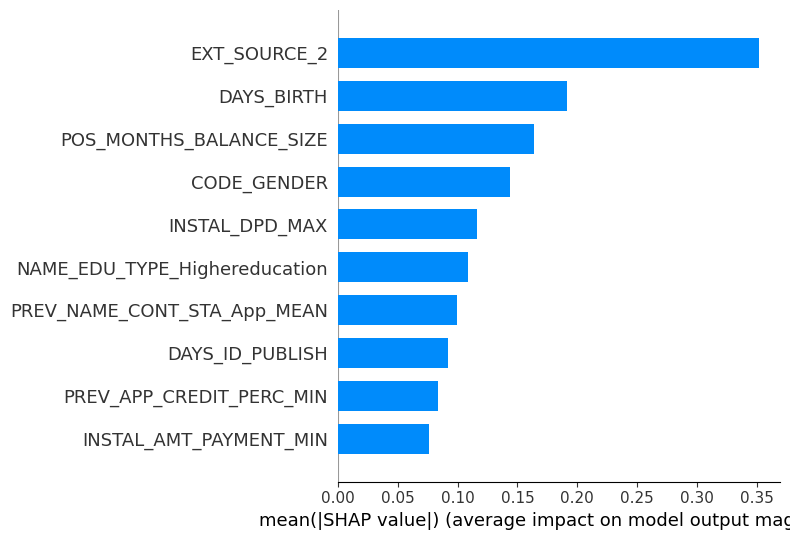

In [30]:
shap.summary_plot(shap_values, features=X, feature_names=X.columns,max_display=10, plot_type='bar')


# <font color='blue'>5 - INTERPRETABILITÉ LOCALE </font>

In [31]:
# Charger les descripteurs ORB extraits dans la question précédente
with open('./APP/shap_values.pkl', 'rb') as f:
    shap_values = pickle.load(f)

with open('./APP/X_test_scaled.pkl', 'rb') as f:
    X_test_scaled = pickle.load(f)

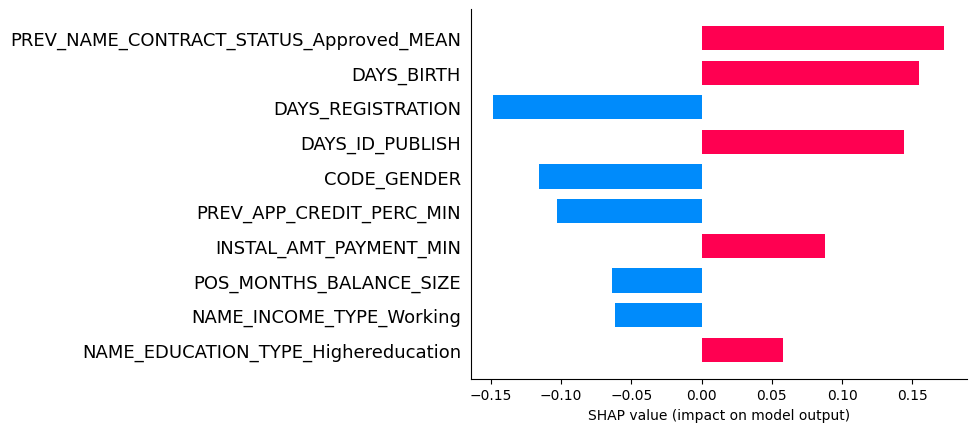

In [32]:
feats = [f for f in clients_data_final.columns if f not in ['TARGET']]
shap.bar_plot(explainer.shap_values(X_test_scaled[2]), feature_names=np.array(feats),max_display=10)


## <font color='red'>Pour chaque client, nous allons pouvoir dire s'il a droit ou non à un au prêt et lui expliquer les principales raisons</font>